# Programming for Data Science - 21KHDL1
# Final Project
# Topic:

## Student Information 
| MSSV     | Họ tên          |
| -------- | --------------- |
| 21120570 | Đặng Nguyễn Thanh Tín |
| 21120574 | Nguyễn Minh Trí |
| 21120580 | Trần Thị Kim Trinh |

## Table of contents
- [Overview](#overview)
- [Data Collection](#data-collection)
- [Data Pre-processing and Exploration](#data-pre-processing-and-exploration)
- [Quick view of Data](#quick-view-of-data)
- [Questions](#questions)
- [Reflection](#reflection)
- [References](#references)


# Overview

The Kaggle dataset on drug-related deaths from 2012-2018 provides comprehensive health-related information, encompassing various factors such as drug categories, demographics including gender and age, and the geographical context of fatalities. Despite its age, this data serves as a crucial resource for comprehending the drug issue and proposing preventative measures. Analyzing the dataset can pinpoint trends and factors contributing to fatalities, supporting prevention and treatment efforts. This presents an opportunity to address the public health challenge and formulate effective anti-drug strategies.

Libraries used

In [31]:
#import những gì bạn cần ở đây
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Collection

**The Connecticut Deaths due to Drugs Dataset** contains information about **5105** people who died due to drug overdose between **2012 and 2018** in Connecticut, US.

The dataset includes data related to the age, race, gender, place of residence of the victims as well as the drugs they overdosed on. This information can be used to understand if drug use is prevalent in a specific area or city, drug use by individuals of different age groups and races as well as the popularity of different types of drugs.

The dataset has **41 columns** and **5105 rows**. The file have the following columns:
1. `ID`: ID of Patient
2. `Date`: The time which Patient died 
3. `DateType`: Type of Date in Column 2 [Date of Reporting or Date of Death]
4. `Age`: Age of Patient
5. `Sex`: Sex of Patient
6. `Race`: Race of Patient
7. `ResidenceCity`: City of Residence
8. `ResidenceCounty`: County of Residence
9. `ResidenceState`: State of Residence
10. `DeathCity`: City of Death
11. `DeathCounty`: County of Death
12. `Location`: Location of Death [Hospital or Residence]
13. `LocationifOther`: Location of Death if Not Hospital or Residence
14. `DescriptionofInjury`: Cause of Death
15. `InjuryPlace`: Place of Event that caused Death
16. `InjuryCity`: City of Event that caused Death
17. `InjuryCounty`: County of Event that caused Death
18. `InjuryState`: State of Event that caused Death
19. `COD`: Detailed Cause of Death
20. `OtherSignifican`: Other Significant Injuries that may have lead to Death
21. `Heroin`: Drug Found in Body [Y/N] liệu heroin đã được phát hiện trong mẫu từ những trường hợp tử vong hay không?
22. `Cocaine`: Drug Found in Body [Y/N]
23. `Fentanyl`: Drug Found in Body [Y/N]
24. `FentanylAnalogue`: Drug Found in Body [Y/N]
25. `Oxycodone`: Drug Found in Body [Y/N]
26. `Oxymorphone`: Drug Found in Body [Y/N]
27. `Ethanol`: Drug Found in Body [Y/N]
28. `Hydrocodone`: Drug Found in Body [Y/N]
29. `Benzodiazepine`: Drug Found in Body [Y/N]
30. `Methadone`: Drug Found in Body [Y/N]
31. `Amphet`: Drug Found in Body [Y/N]
32. `Tramad`: Drug Found in Body [Y/N]
33. `Morphine_NotHeroin`: Drug Found in Body [Y/N]
34. `Hydromorphone`: Drug Found in Body [Y/N]
35. `Other`: Drug Found in Body [Y/N]
36. `OpiateNOS`: Drug Found in Body [Y/N]
37. `AnyOpioid`: Drug Found in Body [Y/N]
38. `MannerofDeath`: Manner of Death
39. `DeathCityGeo`: City of Death
40. `ResidenceCityGeo`: City of Residence
41. `InjuryCityGeo`: City of Injury

# Data Pre-processing and Exploration

**Read Data**

In [2]:
# Đọc dữ liệu từ ./Accidental Drug Related Deaths in Connecticut-2012-2018 và lưu vào DrugDeath_df
DrugDeath_df = pd.read_csv('./Data/Accidental_Drug_Related_Deaths_2012-2022.csv')

DrugDeath_df

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,12/31/2022,Date of death,54.0,Male,White,NaN,OAKVILLE,LITCHFIELD,CT,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OAKVILLE, CT\r\n(41.58854000000008, -73.086909...","WATERBURY, CT\r\n(41.55490000000003, -73.04646...","CT\r\n(41.57350273000003, -72.73830590799997)"
1,12/31/2022,Date of death,61.0,Female,White,NaN,LEBANON,NEW LONDON,CT,WILLIMANTIC,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"LEBANON, CT\r\n(41.64541000000003, -72.2009799...","WILLIMANTIC, CT\r\n(41.71096000000006, -72.205...","CT\r\n(41.57350273000003, -72.73830590799997)"
2,12/31/2022,Date of death,54.0,Male,White,NaN,WEST HAVEN,NEW HAVEN,CT,WEST HAVEN,...,NaN,NaN,NaN,y,NaN,Y,NaN,"WEST HAVEN, CT\r\n(41.27228000000008, -72.9499...","WEST HAVEN, CT\r\n(41.27228000000008, -72.9499...","CT\r\n(41.57350273000003, -72.73830590799997)"
3,12/30/2022,Date of death,48.0,Male,White,NaN,SOMERS,TOLLAND,CT,SOMERS,...,NaN,NaN,NaN,NaN,Buprenorphine,Y,Buprenorphine,"SOMERS, CT\r\n(41.98825000000005, -72.44012999...","SOMERS, CT\r\n(41.98825000000005, -72.44012999...","CT\r\n(41.57350273000003, -72.73830590799997)"
4,12/29/2022,Date of death,41.0,Female,Black or African American,NaN,BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,...,NaN,Y,NaN,NaN,NaN,Y,NaN,"BRIDGEPORT, CT\r\n(41.18213000000003, -73.1906...","BRIDGEPORT, CT\r\n(41.18213000000003, -73.1906...","CT\r\n(41.57350273000003, -72.73830590799997)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,01/07/2012,Date of death,45.0,Male,White,NaN,HARTFORD,HARTFORD,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HARTFORD, CT\r\n(41.765775, -72.673356)","HARTFORD, CT\r\n(41.765775, -72.673356)","Hartford, CT\r\n(41.765775, -72.673356)"
10650,01/05/2012,Date of death,51.0,Male,White,NaN,STRATFORD,FAIRFIELD,NaN,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STRATFORD, CT\r\n(41.200888, -73.131323)","STRATFORD, CT\r\n(41.200888, -73.131323)","Bridgeport, CT\r\n(41.179195, -73.189476)"
10651,01/04/2012,Date of death,61.0,Male,Black,NaN,DANBURY,FAIRFIELD,NaN,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DANBURY, CT\r\n(41.393666, -73.451539)","DANBURY, CT\r\n(41.393666, -73.451539)","Danbury, CT\r\n(41.393666, -73.451539)"
10652,01/03/2012,Date of death,41.0,Male,White,NaN,BRISTOL,HARTFORD,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BRISTOL, CT\r\n(41.673037, -72.945791)","BRISTOL, CT\r\n(41.673037, -72.945791)","Bristol, CT\r\n(41.673037, -72.945791)"


**How many rows and how many columns?**

In [3]:
# Lưu số dòng của DrugDeath_df vào n_rows và số cột của DrugDeath_df vào n_cols
n_rows, n_cols = DrugDeath_df.shape

# In ra màn hình số dòng và số cột của DrugDeath_df
print(f'({n_rows}, {n_cols})')

(10654, 48)


**What is the meaning of each row?**

Each row in this dataset represents information about an individual who passed away due to a drug overdose. Specifically:

<li><b>Demographic Information</b>: Age, gender, race, residential address.</li>
<li><b>Death Information</b>: Date of death, location of death, cause of death, manner of death.</li>
<li><b>Drug-related Information</b>: Presence of specific drugs in the body.</li>

Chọn ra các cột sẽ dùng + giải thích lí do

In [4]:
DrugDeath_df.columns

Index(['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'Death City', 'Death County', 'Death State',
       'Location', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin',
       'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo'],
      dtype='object')

In [5]:
DrugDeath_df = DrugDeath_df[['Date', 'Age', 'Sex', 'Race',
        'Location', 'Cause of Death', 'Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'ResidenceCityGeo',
       'DeathCityGeo']]

**Are there duplicated rows? + Remove duplicate**

In [6]:
# Kiểm tra các dòng bị trùng lặp
duplicate_rows = DrugDeath_df[DrugDeath_df.duplicated()]

# Hiển thị nếu có dòng bị trùng lặp
if duplicate_rows.shape[0] > 0:
    print("There are duplicated rows.")
    # Xóa các dòng trùng lặp
    DrugDeath_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("There are no duplicated rows.")

There are no duplicated rows.


**Conclusion:** We can see that the dataset doesn't have duplicated rows.

**What is the meaning of each column?**

- The data columns is crucial for effective analysis. By carefully examining the column titles and their respective data entries, we can decipher the information they encapsulate. Given the extensive length of the column titles, renaming them for easier handling and analysis becomes essential.

- Through a thorough review of the column titles and their contents, aligned with the context of the survey questionnaire, we can gain a comprehensive understanding of the dataset. This process will enable us to effectively rename the columns, simplifying them for easier manipulation and analysis in subsequent steps.

- The columns in this dataset provide information about emergency cases due to drug overdoses.

What is the current data type of each column? Are there columns having inappropriate data types? If have, converting

In [7]:
# Kiểm tra kiểu dữ liệu hiện tại của các cột
print(DrugDeath_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10654 entries, 0 to 10653
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10654 non-null  object 
 1   Age                    10652 non-null  float64
 2   Sex                    10645 non-null  object 
 3   Race                   10625 non-null  object 
 4   Location               10632 non-null  object 
 5   Cause of Death         10654 non-null  object 
 6   Heroin                 3472 non-null   object 
 7   Cocaine                3855 non-null   object 
 8   Fentanyl               6925 non-null   object 
 9   Fentanyl Analogue      804 non-null    object 
 10  Oxycodone              950 non-null    object 
 11  Oxymorphone            157 non-null    object 
 12  Ethanol                2878 non-null   object 
 13  Hydrocodone            163 non-null    object 
 14  Benzodiazepine         2499 non-null   object 
 15  Me

Hầu hết các cột đều có kiểu dữ liệu đúng, chỉ trừ một số cột sau:

    - Cột Date nên có kiểu là Datetime
    - Các cột như Heroin, Cocaine, Fentanyl,.. xác nhận sự xuất hiện hoặc vắng mặt của mỗi chất độc này, vì thế chúng nên có kiểu dữ liệu là bool thay vì object
    

In [8]:
#Chuyển cột Date thành datetime
# Chuyển cột Date thành datetime
DrugDeath_df['Date'] = pd.to_datetime(DrugDeath_df['Date'], format='%m/%d/%Y')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25484\1500526394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DrugDeath_df['Date'] = pd.to_datetime(DrugDeath_df['Date'], format='%m/%d/%Y')


Ta sẽ xem xét các cột nên có kiểu dữ liệu boolean

In [9]:
#Xem các giá trị có trong các cột
drugs = ['Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine']

for col in drugs: 
    print(col)
    print(DrugDeath_df[col].unique())

Heroin
[nan 'Y']
Cocaine
['Y' nan]
Fentanyl
[nan 'Y' 'Y (PTCH)' 'Y POPS']
Fentanyl Analogue
[nan 'Y']
Oxycodone
[nan 'Y']
Oxymorphone
[nan 'Y']
Ethanol
[nan 'Y' 'P']
Hydrocodone
[nan 'Y']
Benzodiazepine
[nan 'Y']
Methadone
[nan 'Y']
Meth/Amphetamine
[nan 'Y']
Amphet
[nan 'Y']
Tramad
[nan 'Y']
Hydromorphone
[nan 'Y']
Morphine (Not Heroin)
[nan 'Y' 'PCP NEG' 'NO RX BUT STRAWS' 'STOLE MEDS']
Xylazine
[nan 'Y']
Gabapentin
[nan 'Y' 'y']
Opiate NOS
[nan 'Y']
Heroin/Morph/Codeine
[nan 'y' 'Y']


In this problem, `NaN` and `N` can be considered equivalent as there is no evidence that the victim's body contains the tested substance.

We can observe that most columns are normal, except for a few specific ones:

- **Other Opioid:** Includes values [nan 'Buprenorphine' 'MDMA, Buprenorphine' 'Mitragynine' 'ketamine' 'PCP' 'Difluro' 'pcp' 'Y']. Since this column represents the presence of other addictive substances, we can treat answers like 'Buprenorphine' 'MDMA, Buprenorphine', ... as 'Y'.

- **Morphine (Not Heroin):** [nan 'Y' 'PCP NEG' 'NO RX BUT STRAWS' 'STOLE MEDS']. Firstly, let's examine the meaning of special values:
    - `PCP NEG`: Indicates a negative result for PCP, unrelated to Heroin. Treat as 'Y'.
    - `NO RX BUT STRAWS`: Indicates the absence of a prescription but presence of straws, likely unrelated to Heroin. Treat as 'Y'.
    - `STOLE MEDS`: Indicates stolen medication, unrelated to Heroin. Treat as 'Y'. 
    --> Therefore, this column can be considered 'Y' for these special cases.

- **Fentanyl:** [nan 'Y' 'Y (PTCH)' 'Y POPS']
    - `Y PTCH`: Fentanyl detected in patch form.
    - `Y POPS`: Fentanyl detected in candy form.
    Treat these values as 'Y'.

In conclusion, a common approach for all columns can be formulated as follows:

In [10]:
#chuyển thành kiểu boolean (null hoặc 'N' là False, còn lại là True)
for col in drugs: 
    DrugDeath_df[col] = DrugDeath_df[col].notnull() & (DrugDeath_df[col] != 'N')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25484\1931194616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DrugDeath_df[col] = DrugDeath_df[col].notnull() & (DrugDeath_df[col] != 'N')


"With each categorical column, how are values distributed?
- What is the percentage of missing values?
- How many different values? Are they abnormal?"

In [11]:
import pandas as pd
import plotly.graph_objects as go

missing_values = DrugDeath_df.isnull().sum().sort_values(ascending=True)

fig = go.Figure(data=[go.Bar(
    y=missing_values.index,
    x=missing_values.values,
    orientation='h',
    marker_color='#1f77b4'
)])

fig.update_layout(
    title_text='Số lượng giá trị bị thiếu của mỗi cột',
    xaxis_title='Số lượng giá trị bị thiếu',
    yaxis_title='Tên cột',
    yaxis={'autorange': 'reversed'},
    height=800
)

fig.show()


<h2> Handle missing value </h2>

- In this process, i will use **Imputation**.
    - For categorical data, mode (the most frequent value) is often used. 
    - For numerical data, mean or median can be used depending on the data distribution.

In [12]:



categorical_cols = DrugDeath_df.select_dtypes(include=['object', 'category']).columns
numerical_cols = DrugDeath_df.select_dtypes(include=['int64', 'float64']).columns

missing_categorical_cols = [col for col in categorical_cols if DrugDeath_df[col].isnull().any()]
missing_numerical_cols = [col for col in numerical_cols if DrugDeath_df[col].isnull().any()]

print("Categorical columns with missing values:")
print(missing_categorical_cols)

print("\nNumerical columns with missing values:")
print(missing_numerical_cols)

Categorical columns with missing values:
['Sex', 'Race', 'Location', 'ResidenceCityGeo', 'DeathCityGeo']

Numerical columns with missing values:
['Age']


In [13]:
#Xử lí Age, Sex, Location, Race bằng cách điền mean và mode
# For numerical columns
DrugDeath_df['Age'] = DrugDeath_df['Age'].fillna(DrugDeath_df['Age'].mean())

# For categorical columns
for col in missing_categorical_cols:
    DrugDeath_df[col] = DrugDeath_df[col].fillna(DrugDeath_df[col].mode()[0])




C:\Users\Admin\AppData\Local\Temp\ipykernel_25484\1501385792.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\AppData\Local\Temp\ipykernel_25484\1501385792.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:

missing_cols = DrugDeath_df.columns[DrugDeath_df.isnull().any()].tolist()

print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
[]


<h2> Handle abnormal value </h2>

- In the column `Cause of Death`, there are values like: 
    - **Acetyl Fentanyl**, those values belong to `Fentanyl Analogue` column.
    - **Tramadol** belongs to the `Tramad` column, and there are some abnormal cases like that.
- For example: with the value `"Acute Intoxication due to the Combined Effects of Fentanyl, Xylazine, Cocaine and Tramadol"` , i will turn it into
`"Fentanyl, Xylazine, Cocaine, Tramadol"`.

- How i solve this issue?
    - Step 1: remove unwanted words, like: "Acute Intoxication due to the Combined Effects of" , "and", etc.
    - Step 2: create a new column `Details Cause` from drugs' name in the `Cause of Death` to help out later work easier.
        - For example: with the value `"Acute Intoxication due to the Combined Effects of Fentanyl, Xylazine, Cocaine and Tramadol"` , i will turn it into `"Fentanyl, Xylazine, Cocaine, Tramadol"`.





<h3> Step1 </h3>

In [15]:
# rename 'Cause of Death' into COD for more convienient

DrugDeath_df = DrugDeath_df.rename(columns={'Cause of Death': 'COD'})

#Tạo cột mới chứa ds các thuốc là nguyên nhân trục tiếp gây tử vong
# Đổi tên cột 'Cause of Death' thành 'COD'
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.lower()

# Loại bỏ các từ không mong muốn
unwanted_words = ['from the', 'complications', ' of ', 'toxicity associated with', 'intoxiation', 'multidrug', 'toxicity' ,'including', 'chronic substance abuse'
    'acute intoxication by the combined effects of','effects', 'toxicities','combined','intoxication', 'acute', 'due to' ,'the', 'combined effects of', 'combined drug toxicity', 'multi-drug', 'following','chronic substance use','(',')']
for word in unwanted_words:
    DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace(word, '')

# Thay thế 'and' bằng ','
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('and', ',')
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('  ', ',')
DrugDeath_df['COD'] = DrugDeath_df['COD'].str.replace('/', ',')



<h3> Step 2</h3>

In [16]:
# Lấy các giá trị duy nhất từ cột 'COD'
print(DrugDeath_df.columns[8:-3])

Index(['Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS'],
      dtype='object')


Create a new column from COD , to categorize value in COD to match with the drug columns

In [17]:
import pandas as pd
import numpy as np

# List of drugs
drugs = ['Heroin', 'Cocaine',
       'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone','Amphetamine',
       'Tramadol', 'Hydromorphone', 'Morphine',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin','Codeine']

def remove_dup(df, column):
    df[column] = df[column].apply(lambda x: ', '.join(sorted(set(str(x).split(', ')))))
    return df

# Function to find drugs in 'COD' and add them to 'Details Cause'
def find_drugs(row):
    details_cause = []
    for drug in drugs:
        if drug.lower() in row['COD'].lower() or (drug.lower() + 's') in row['COD'].lower():
            details_cause.append(drug)
    if 'alcohol' in row['COD'].lower():
        details_cause.append('Ethanol')
    if 'fentanyl' in row['COD'].lower():
        details_cause.append('Fentanyl')
    if 'opiates' in row['COD'].lower() or 'opiate' in row['COD'].lower() :
        details_cause.append('Opiate NOS')
    if any(word.strip() in ['fentanyl', 'Fentanyl'] for word in row['COD'].split(',')):
        details_cause.append('Fentanyl Analogue')
    if not details_cause:
        details_cause.append('Other')
        return details_cause
    return ', '.join(details_cause)

# Apply the function to the 'COD' column
DrugDeath_df['Details Cause'] = DrugDeath_df.apply(find_drugs, axis=1)
DrugDeath_df = remove_dup(DrugDeath_df, 'Details Cause')



In [26]:
# value count for each name of drug in each row

# def count_drug_frequency(df, column):
#     # Split the column into separate drugs
#     df[column] = df[column].str.split(',')

#     # Expand the lists into separate rows
#     df = df.explode(column)

#     # Strip leading/trailing whitespace
#     df[column] = df[column].str.strip()

#     # Count the frequency of each drug
#     drug_counts = df[column].value_counts()

#     return drug_counts


# drug_counts = count_drug_frequency(DrugDeath_df, 'Details Cause')
# print(drug_counts)



array(['Hospital - ER/Outpatient', 'Hospital - Inpatient',
       'Decedent’s Home', 'Other (Specify)', 'Nursing Home',
       'Hospital - Dead On Arrival', 'Hiospital', 'Hospice Facility',
       "Decedent's Home", 'Residence', 'Assisted Living', 'Other',
       'Hospital', 'Hospice', 'Convalescent Home', 'Shelter'],
      dtype=object)

<h2> With numerical column, how are values distributed? </h2>

In [27]:
min_value = DrugDeath_df['Age'].min()
max_value = DrugDeath_df['Age'].max()
q1 = DrugDeath_df['Age'].quantile(0.25)
q2 = DrugDeath_df['Age'].median()
q3 = DrugDeath_df['Age'].quantile(0.75)

print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Q1: {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3: {q3}")

Min: 13.0
Max: 87.0
Q1: 33.0
Q2 (Median): 43.0
Q3: 54.0


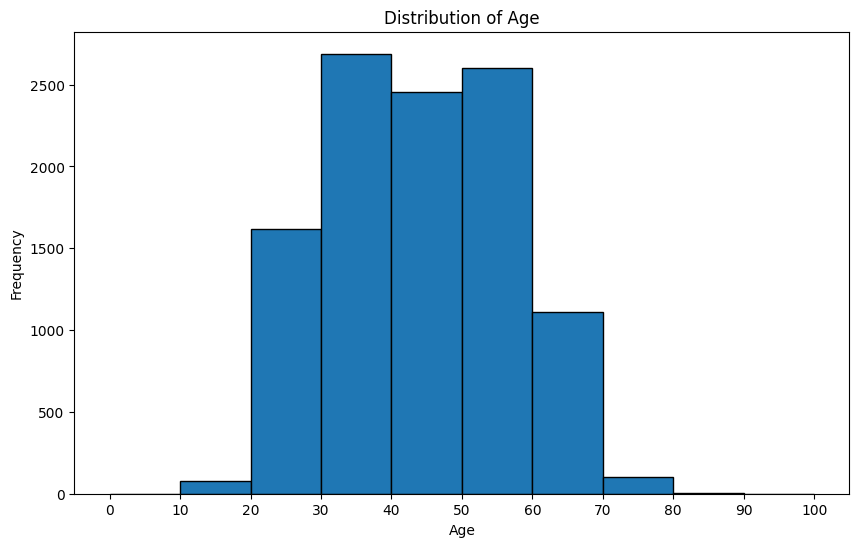

In [39]:
num_bins = int(np.sqrt((DrugDeath_df['Age'].nunique())))


plt.figure(figsize=(10,6))
plt.hist(DrugDeath_df['Age'],bins=range(0, 101, 10), edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.xticks(range(0, 101, 10))
plt.ylabel('Frequency')
plt.show()


# Quick view of Data

# Questions

# Reflection

# References